### **Task 1 – Classification using K-Nearest Neighbors & Support Vector Machine Classifiers**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
x = wine_quality.data.features
y = wine_quality.data.targets

# Define features and target variable
#X = df.drop(columns=['loan_status'])
#y = df['loan_status']


# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.tail()

,quality
6492,6
6493,5
6494,6
6495,7
6496,6


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
y.nunique()

,0
quality,7


In [ ]:
y.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to all categorical columns
for col in x.columns:
    x.loc[:, col] = label_encoder.fit_transform(x[col])

# Encode the target variable as well
y = label_encoder.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,36.0,117.0,0.0,23.0,65.0,11.0,28.0,823.0,74.0,33.0,14.0
1,40.0,153.0,0.0,36.0,87.0,29.0,61.0,735.0,43.0,45.0,24.0
2,40.0,129.0,4.0,31.0,81.0,16.0,48.0,755.0,49.0,42.0,24.0
3,74.0,38.0,56.0,23.0,64.0,19.0,54.0,838.0,39.0,35.0,24.0
4,36.0,117.0,0.0,23.0,65.0,11.0,28.0,823.0,74.0,33.0,14.0


In [ ]:
import pandas as pd
y_series = pd.Series(y)
y_series.tail()

,0
6492,3
6493,2
6494,3
6495,4
6496,3


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling only to feature variables (not target variable)
x_scaled = scaler.fit_transform(x)

# Convert back to DataFrame for better readability
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Display the first few rows
print(x_scaled_df.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.209072          2.194027    -2.219301       -0.763706   0.767280   
1       0.501834          3.359419    -2.219301       -0.590938   1.570114   
2       0.501834          2.582491    -1.940366       -0.657388   1.351159   
3       2.990311         -0.363362     1.685795       -0.763706   0.730787   
4       0.209072          2.194027    -2.219301       -0.763706   0.767280   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.103357             -1.435464  1.127206  1.819362   0.204508   
1            -0.354696             -0.872563  0.780176 -0.114991   1.038154   
2            -0.895395             -1.094312  0.859047  0.259400   0.829742   
3            -0.770619             -0.991966  1.186359 -0.364585   0.343449   
4            -1.103357             -1.435464  1.127206  1.819362   0.204508   

    alcohol  
0 -0.932430  
1 -0.556348  
2 -0.556348  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Step 1: Split dataset into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 (default choice)
knn.fit(x_train, y_train)

# Step 3: Create and train SVM classifier
svm = SVC(kernel='linear', random_state=42)  # Using linear kernel for SVM
svm.fit(x_train, y_train)

# Print confirmation
print("KNN and SVM classifiers have been trained successfully!")


KNN and SVM classifiers have been trained successfully!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n🔹 {model_name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


🔹 K-Nearest Neighbors Evaluation:
Accuracy: 0.5754
Precision: 0.5672
Recall: 0.5754
F1-Score: 0.5648


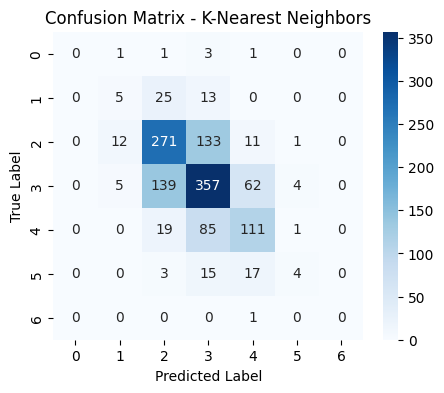

In [ ]:
# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


🔹 Support Vector Machine Evaluation:
Accuracy: 0.5231
Precision: 0.6429
Recall: 0.5231
F1-Score: 0.4526


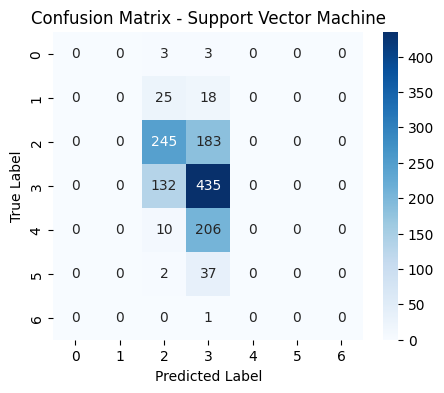

In [ ]:
# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

## **Task 2 - Bonus Task**

In [ ]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()


Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded filename dynamically
filename = list(uploaded.keys())[0]  # Automatically gets the uploaded filename

# Step 3: Load dataset into Pandas DataFrame
df = pd.read_csv(f"/content/{filename}")


Saving loan_approval_dataset.csv to loan_approval_dataset (2).csv


In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Print column names to verify
print("Columns in dataset:", df.columns)

# Drop 'loan_id' as it is not a predictive feature
if 'loan_id' in df.columns:
    df = df.drop(columns=['loan_id'])

# Check if required columns exist
required_cols = ['education', 'self_employed', 'loan_status']
missing_cols = [col for col in required_cols if col not in df.columns]

Columns in dataset: Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [ ]:
# Preprocessing: Handling categorical data
label_encoders = {}
for column in required_cols:
      le = LabelEncoder()
      df[column] = le.fit_transform(df[column])
      label_encoders[column] = le

# Define features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Train SVM model
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n🔹 {model_name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


🔹 K-Nearest Neighbors Evaluation:
Accuracy: 0.8970
Precision: 0.8966
Recall: 0.8970
F1-Score: 0.8966


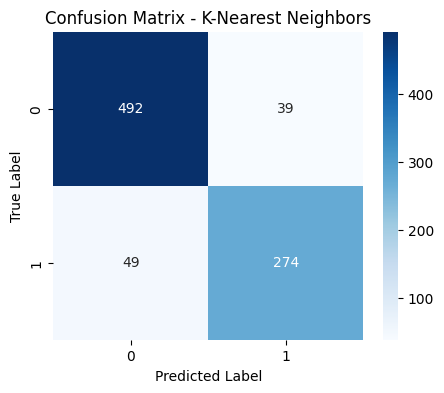

In [ ]:
# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


🔹 Support Vector Machine Evaluation:
Accuracy: 0.9426
Precision: 0.9425
Recall: 0.9426
F1-Score: 0.9425


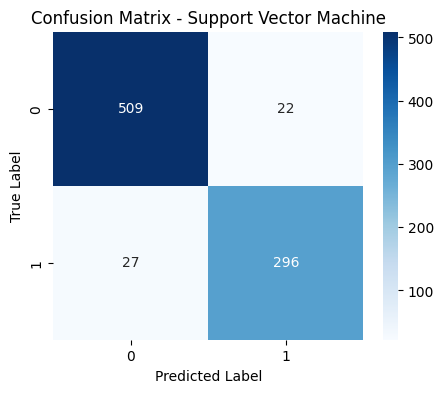

In [ ]:
# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

In [ ]:
# Model Choice Justification
print("\nModel Choice Justification:")
print("✔ KNN works well for smaller datasets but struggles with high-dimensional data.")
print("✔ SVM (RBF kernel) is better suited for handling complex relationships and is generally more robust.")
print("✔ SVM is prefered model since SVM outperformed KNN in all metrics, achieving a higher accuracy (94.2% vs. 89.7%) and better precision, recall, and F1-score")


Model Choice Justification:
✔ KNN works well for smaller datasets but struggles with high-dimensional data.
✔ SVM (RBF kernel) is better suited for handling complex relationships and is generally more robust.
✔ SVM is prefered model since SVM outperformed KNN in all metrics, achieving a higher accuracy (94.2% vs. 89.7%) and better precision, recall, and F1-score
